## 서울 지하철 유/무임 승차 데이터
T-money 제공

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df =pd.read_csv('subwayfee.csv', encoding='cp949')
df = df.dropna() #누락값이 있는 행은 버린다.
df.shape, df.head

((597, 9),
 <bound method NDFrame.head of         사용월       호선명   역ID          지하철역     유임승차     유임하차    무임승차    무임하차  \
 0    May-19       1호선   150           서울역  1568570  1489737  247801  242107   
 1    May-19       1호선   151            시청   709821   727110  112279  112016   
 2    May-19       1호선   152            종각  1204910  1151371  176083  164915   
 3    May-19       1호선   153          종로3가   699000   647664  408682  382809   
 4    May-19       1호선   154          종로5가   561662   578374  307515  295535   
 5    May-19       1호선   155           동대문   338565   385522  151904  158360   
 6    May-19       1호선   156           신설동   386676   376451  131597  126524   
 7    May-19       1호선   157           제기동   297370   286647  353695  375436   
 8    May-19       1호선   158  청량리(서울시립대입구)   480600   499265  336216  341637   
 9    May-19       1호선   159           동묘앞   204325   225362  171004  173844   
 10   May-19       2호선   201            시청   742471   719019   65213   60288   

In [11]:

arr = np.array(df) #배열로 변환
arr.shape, arr[0]

((597, 9),
 array(['May-19', '1호선', 150, '서울역', 1568570, 1489737, 247801, 242107,
        '2019-06-03 10:56'], dtype=object))

In [18]:
유임승차 = (arr[:,4]).astype(np.int)
arr[np.argmax(유임승차), 1:4:2],np.max(유임승차), np.argmax(유임승차)

(array(['2호선', '강남'], dtype=object), 2894341, 31)

In [20]:
무임승차 = (arr[:,6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 1:4:2],np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

#유무임 승하차 인원이 가장 많은 역은 어디일까

In [25]:
전체승하차인원 = arr[:,6:8].astype(np.int)
역이용인원 = np.sum(전체승하차인원, axis=1)
arr[np.argmax(역이용인원), 1:4:2], np.max(역이용인원), np.argmax(역이용인원)

(array(['1호선', '종로3가'], dtype=object), 791491, 3)

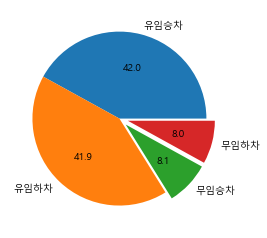

In [31]:
columns = arr[0,:]
a = np.sum(arr[:,4:8].astype(np.int),axis=0)
plt.rc('font', family="Malgun Gothic")
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f',explode=[0,0,0.1,0.1])


모든 역마다 유무임 승차 비율을 따로 파이차트로 나타내기(100만명 이상)

In [34]:
for i in range(len(arr)) : 
    row =arr[i]
    승하차인원 = row[4:8]
    유임승차 = 승하차인원[0]
    if 유임승차>1000000:
        plt.rc('font', family="Malgun Gothic")
        n = plt.pie(row[4:8], labels=df.columns[4:8], autopct='%.1f',explode=[0,0,0.1,0.1])
        역이름 = row[3]
        파일명 = 'subway_' +역이름 + '.png'
        plt.title(역이름+'역 유무임 승차 비율')
        plt.savefig(파일명)
        plt.close()